In [2]:
import pandas as pd

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/horse.csv"
horse_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(horse_data.head())


  surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_pro

In [3]:
# Check for missing values
missing_values = horse_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (example: filling with mean or dropping rows)
horse_data.fillna(horse_data.mean(numeric_only=True), inplace=True)
horse_data.dropna(inplace=True)  # Drop rows with missing categorical data


Missing Values:
 surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


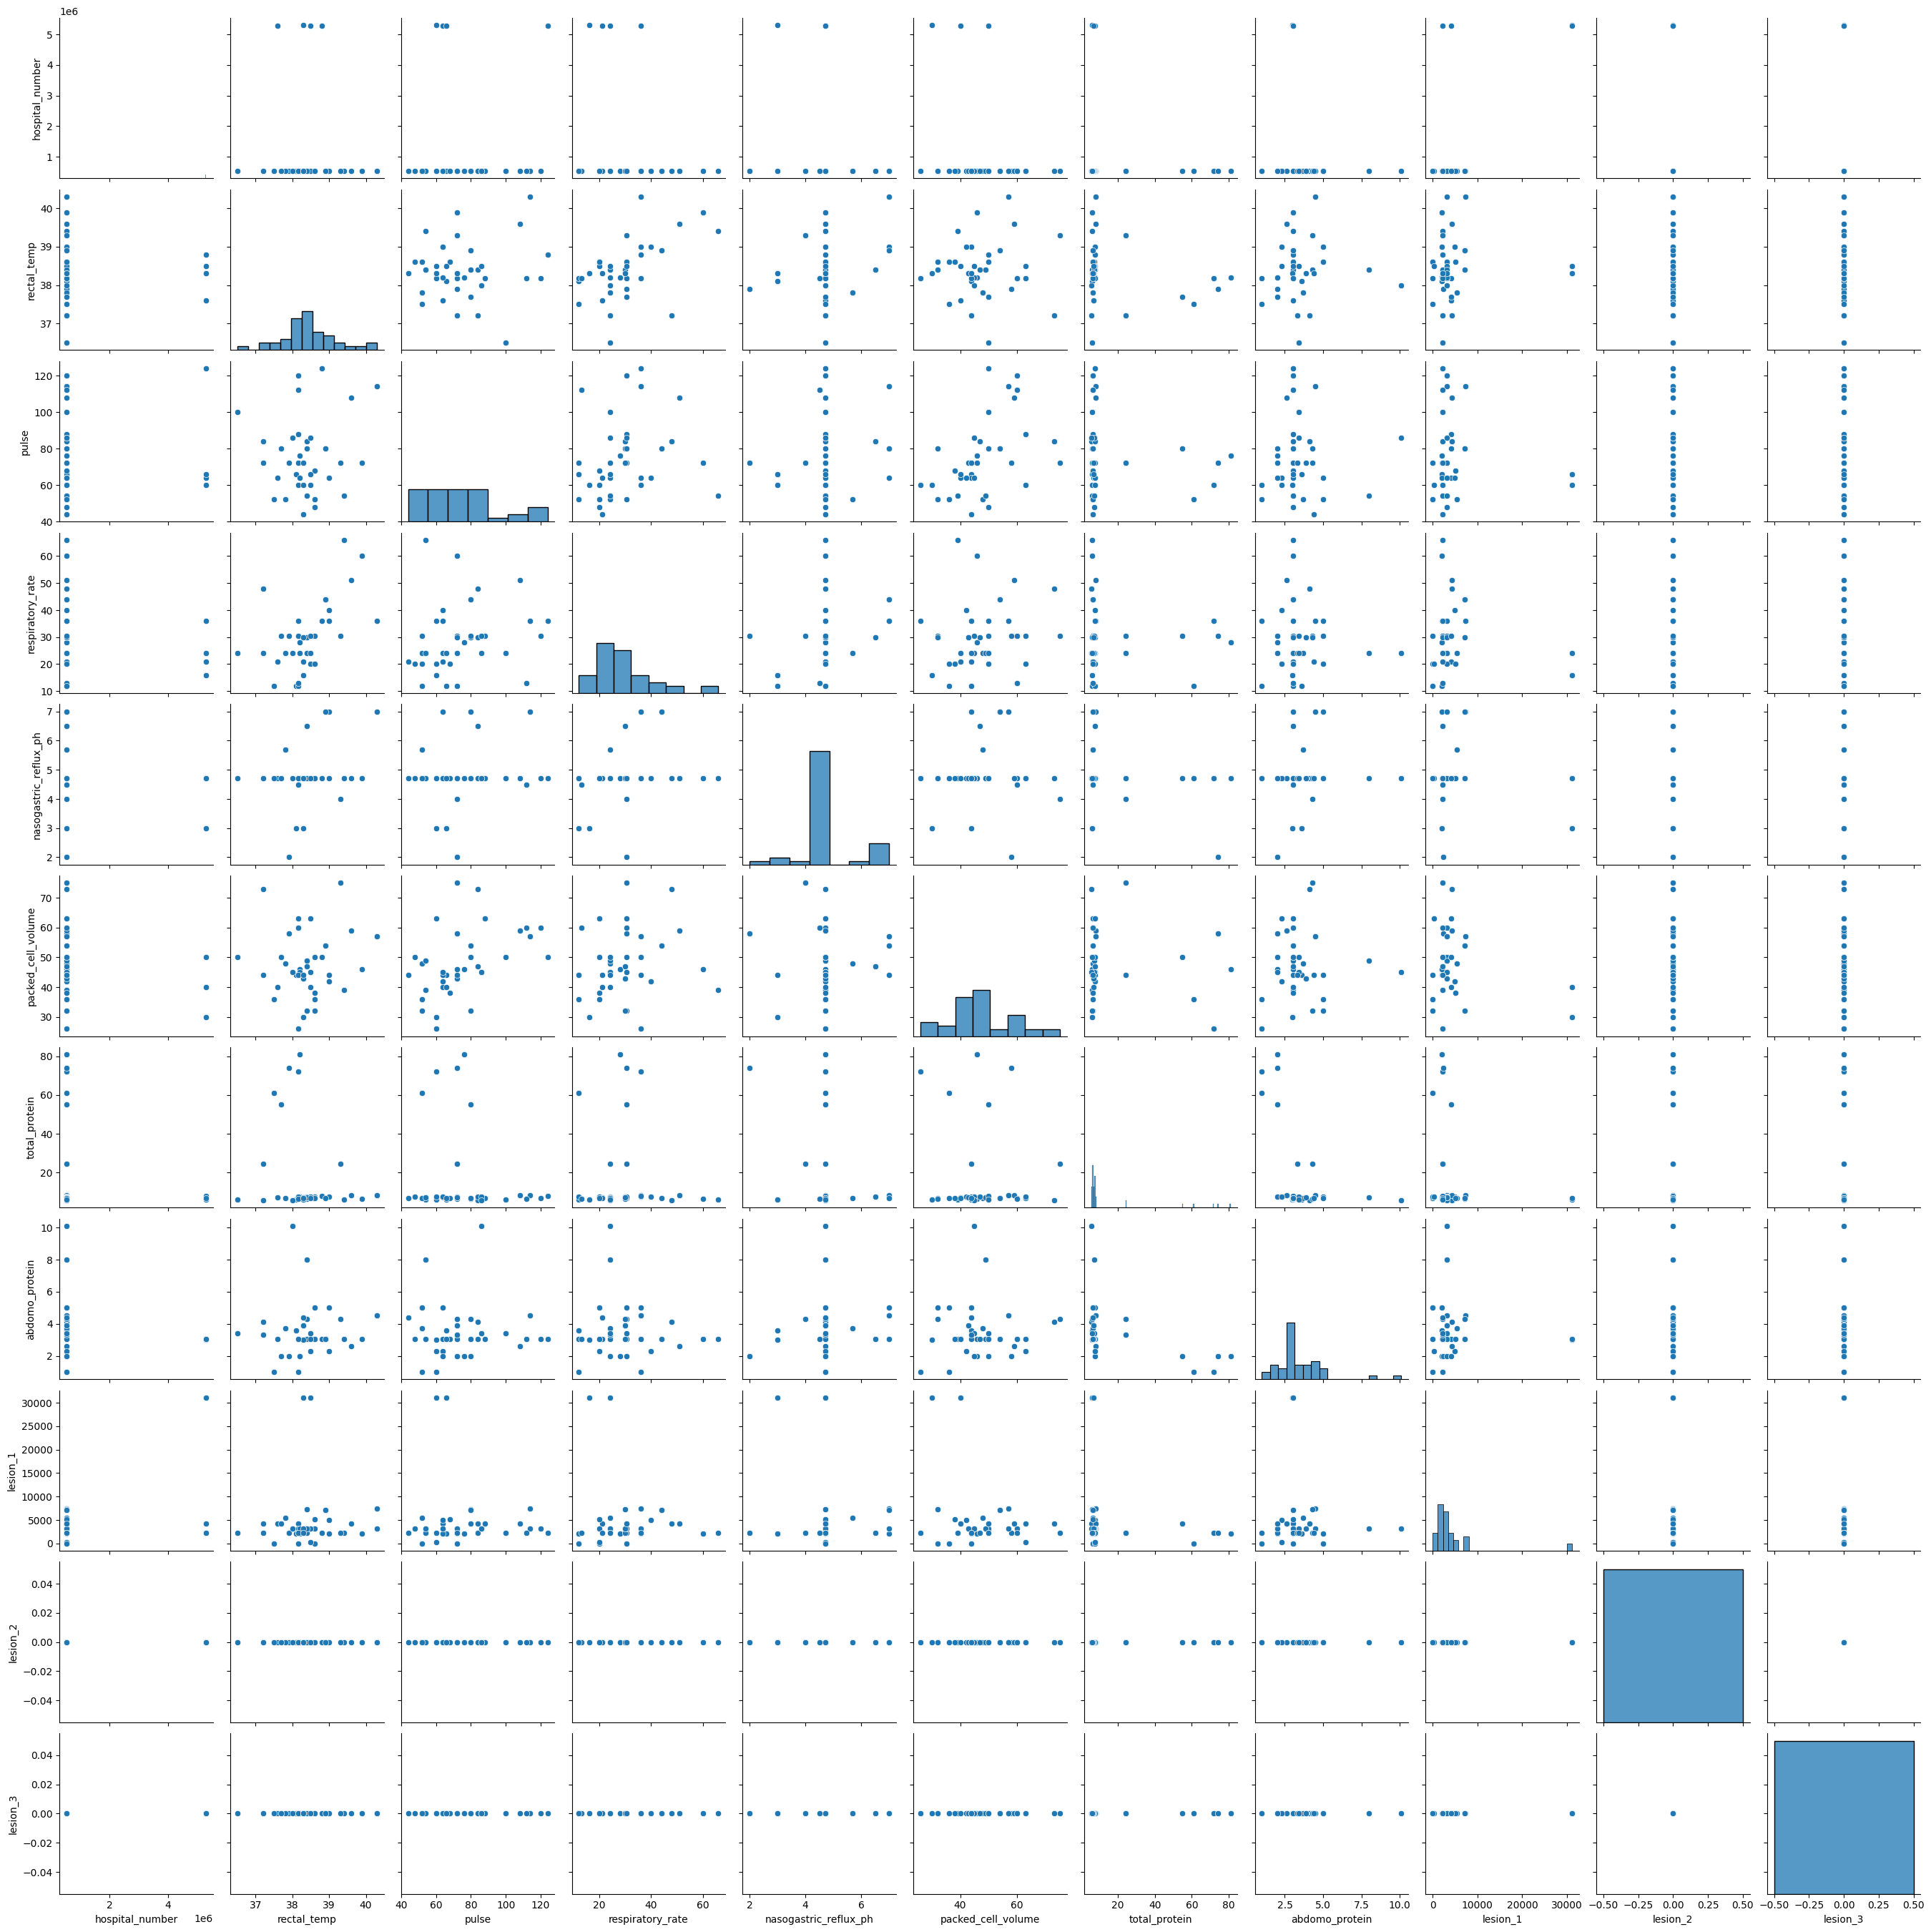

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to identify relationships
sns.pairplot(horse_data)
plt.show()

# Assign independent and dependent variables based on insights
X = horse_data[['age']]  # Example independent feature
y = horse_data['pulse']  # Example dependent feature


In [12]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = horse_data.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    horse_data[col] = label_encoders[col].fit_transform(horse_data[col])

# Verify the transformed dataset
print(horse_data.head())
# Example: Check selected features
X = horse_data[['age']]  # Replace 'age' with a valid numerical column
y = horse_data['pulse']  # Replace 'pulse' with a valid numerical target

# Validate types
print(X.dtypes)
print(y.dtypes)



    surgery  age  hospital_number  rectal_temp  pulse  respiratory_rate  \
10        1    0           528548         38.1   66.0              12.0   
14        1    0           534917         38.2   76.0              28.0   
18        1    0          5290481         37.6   64.0              21.0   
20        1    0           530157         39.9   72.0              60.0   
26        1    0           530526         38.3   72.0              30.0   

    temp_of_extremities  peripheral_pulse  mucous_membrane  \
10                    1                 3                1   
14                    1                 2                3   
18                    2                 2                0   
20                    2                 2                1   
26                    0                 3                5   

    capillary_refill_time  ...  packed_cell_volume  total_protein  \
10                      0  ...                44.0            6.0   
14                      0  ...        

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Convert to numeric arrays if necessary
X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=float)
X_test = np.array(X_test, dtype=float)

# Train the model
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

# Predict on test set
y_pred = reg1.predict(X_test)
print("Predicted values:", y_pred)




Predicted values: [73.35714286 73.35714286 73.35714286 73.35714286 73.35714286 73.35714286
 73.35714286 73.35714286 73.35714286 73.35714286 73.35714286 73.35714286
 73.35714286 73.35714286 73.35714286]


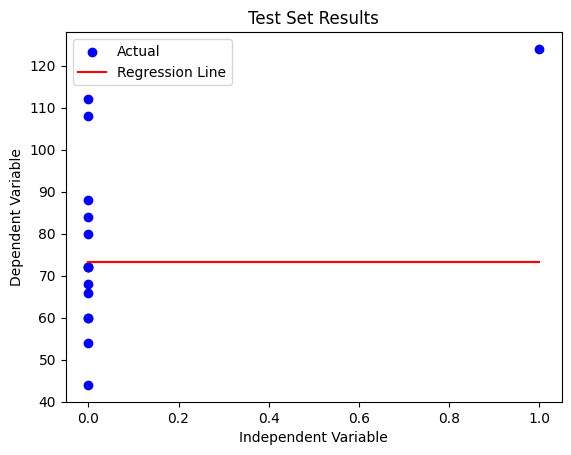

In [16]:
# Visualize the test set results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Test Set Results')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()


In [18]:
import numpy as np

# Add log-transformed feature (example)
horse_data['log_pro'] = np.log(horse_data['total_protein'] + 1)  # Add 1 to avoid log(0)

# Select features
X_multi = horse_data[['log_pro', 'age', 'pulse']]  # Example features
y_multi = horse_data['outcome']  # Example target

# Split dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=1/3, random_state=42)

# Fit multiple linear regression
reg2 = LinearRegression()
reg2.fit(X_train_multi, y_train_multi)

# Summarize the model
print("Intercept:", reg2.intercept_)
print("Coefficients:", reg2.coef_)


Intercept: 2.136946534871565
Coefficients: [ 0.24303043  0.         -0.02021167]


In [19]:
# Predict and calculate residuals
y_pred_multi = reg2.predict(X_test_multi)
residuals_multi = y_test_multi - y_pred_multi

# Combine predicted and residuals into a single DataFrame
comparison = pd.DataFrame({
    'Predicted': y_pred_multi,
    'Residuals': residuals_multi
})
print(comparison.head())


     Predicted  Residuals
265   1.252236   0.747764
158   1.201807   0.798193
179   0.959267  -0.959267
263   1.737316   0.262684
251   0.153643  -0.153643


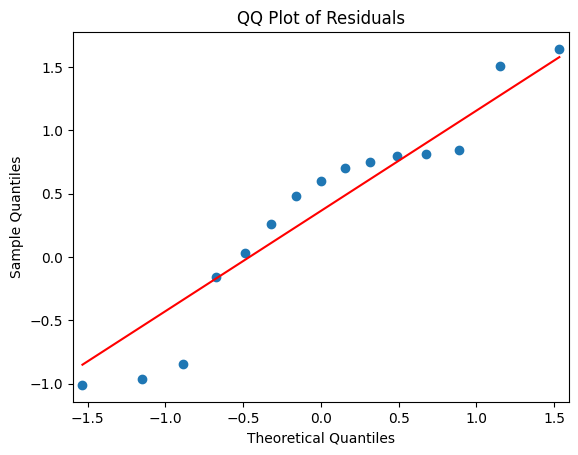

In [20]:
import statsmodels.api as sm

# QQ Plot for residuals
sm.qqplot(residuals_multi, line='s')
plt.title('QQ Plot of Residuals')
plt.show()
